In [19]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

import os

baseline_dir = "Perceiver/Perceiver_baseline"
patch_noise_dir = "Perceiver/Perceiver_corr_snp_100"
overall_noise_dir = "Perceiver/Perceiver_corr_gauss_var_005"

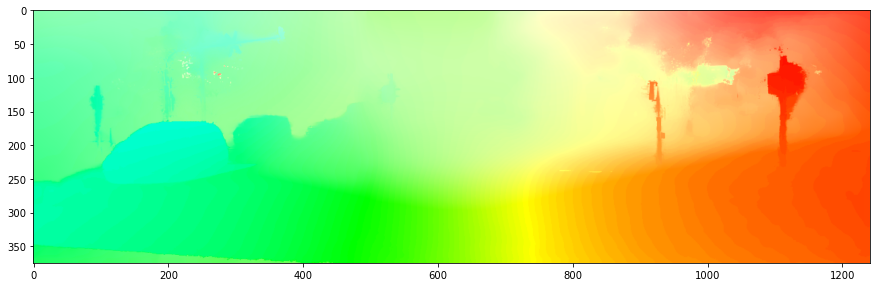

In [20]:
flow_baseline = cv2.imread(os.path.join(baseline_dir, "10.png"))
flow_patch = cv2.imread(os.path.join(patch_noise_dir, "10.png"))
flow_overall = cv2.imread(os.path.join(overall_noise_dir, "10.png"))

flow_baseline = cv2.cvtColor(flow_baseline, cv2.COLOR_BGR2RGB)
flow_patch = cv2.cvtColor(flow_patch, cv2.COLOR_BGR2RGB)
flow_overall = cv2.cvtColor(flow_overall, cv2.COLOR_BGR2RGB)

plt.imshow(flow_baseline)

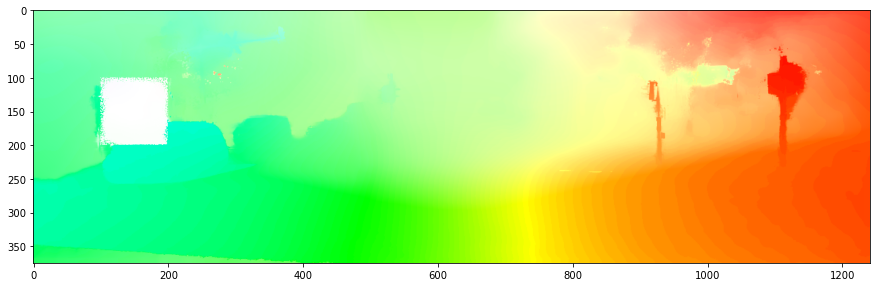

In [21]:
plt.imshow(flow_patch)

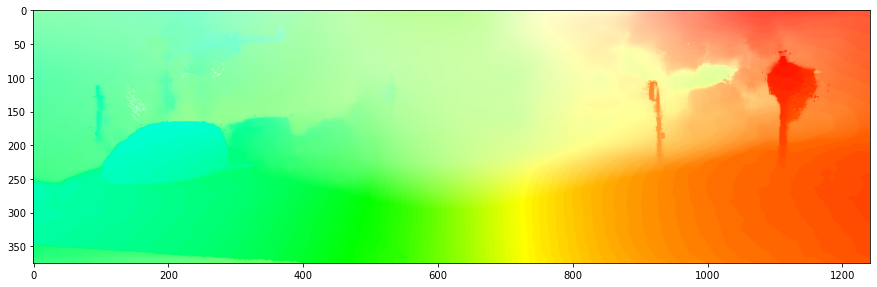

In [22]:
plt.imshow(flow_overall)

In [23]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [24]:
def mse_wo_patch(imageA, imageB, patch_size=100):
    height, width, _ = imageA.shape
    
    imageA = imageA.astype("float")
    imageB = imageB.astype("float")
    
    total_err = 0
    
    for i in range(height):
        for j in range(width):
            
            if not (100 <= i <= 100 + patch_size) and not (100 <= j <= 100 + patch_size):
                total_err += np.sum((imageA[i][j] - imageB[i][j]) ** 2)
    
    total_err /= float((imageA.shape[0] * imageA.shape[1]) - (patch_size ** 2))
    
    return total_err
                

In [26]:
mse_patch = 0
mse_overall = 0


for img in os.listdir(baseline_dir):
    flow_baseline = cv2.imread(os.path.join(baseline_dir, img))
    flow_patch = cv2.imread(os.path.join(patch_noise_dir, img))
    flow_overall = cv2.imread(os.path.join(overall_noise_dir, img))

    flow_baseline = cv2.cvtColor(flow_baseline, cv2.COLOR_BGR2RGB)
    flow_patch = cv2.cvtColor(flow_patch, cv2.COLOR_BGR2RGB)
    flow_overall = cv2.cvtColor(flow_overall, cv2.COLOR_BGR2RGB)
    
    mse_patch += mse_wo_patch(flow_baseline, flow_patch)
    mse_overall += mse(flow_baseline, flow_overall)
    
print("MSE with patch noise: ", mse_patch / len(os.listdir(baseline_dir)))
print("MSE with overall Gaussian noise: ", mse_overall / len(os.listdir(baseline_dir)))
    

MSE with patch noise:  46.65587005323921
MSE with overall Gaussian noise:  6086.994885027193
